# Introduction

Welcome to this notebook. In this notebook, I will try to cluster districts of Munich and try to distinguish each cluster from each other. Main object of this notebook is to label and interpret each cluster correctly. The end result will be a visualization of clusters on the map of the city. The final outcome should clearly tell how and where the city is divided into residential/entertainment venues, and if there are internal differences in these groups.

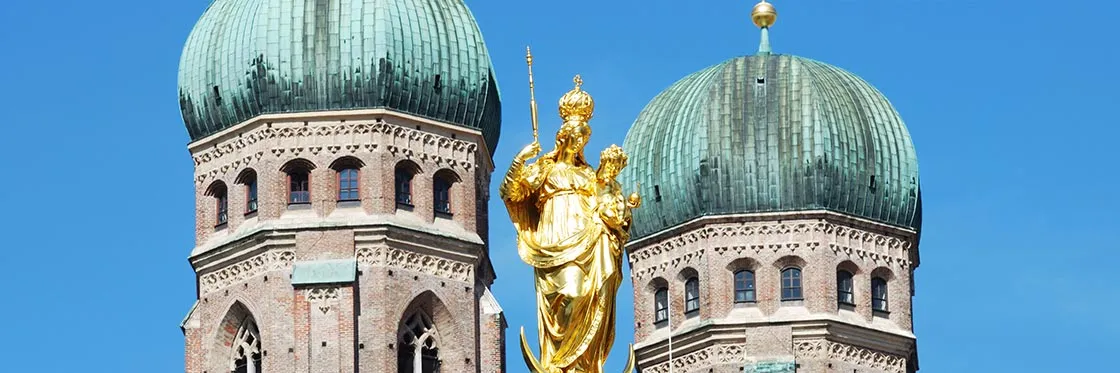

# Data

The raw data (districts and their postcodes) will be downloaded from Munich's city web page. I'll demonstrate how the raw data will be transformed for FS API calls.

In [1]:
# libraries for data manipulation, visualization and ML
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn

# libraries for web scraping
import requests
from bs4 import BeautifulSoup

import folium # for maps 

import pickle # to save the data frame

Let's get the district names and the postal codes in each district from the Munich's city website, and set up the initial data frame.

In [2]:
url = 'https://www.muenchen.de/int/en/living/postal-codes.html'
presoup = requests.get(url).text
soup = BeautifulSoup(presoup)


# scrape the table on the website
table = soup.find('table')

# skipping the header row

contents = []

for row in table.findAll('tr')[1:]:
    sample = row.findAll('td') # 2 columns; district and the postal code
    print("Adding...")
    print(sample[0].text, ';', sample[1].text)
    print()
    cell = {}
    cell['District'] = sample[0].text
    cell['PostCode'] = sample[1].text
    contents.append(cell)

# create a data rame out of the contents list

df = pd.DataFrame(contents)

display(df.head())

Adding...
Allach-Untermenzing ; 80995, 80997, 80999, 81247, 81249

Adding...
Altstadt-Lehel ; 80331, 80333, 80335, 80336, 80469, 80538, 80539

Adding...
Au-Haidhausen ; 81541, 81543, 81667, 81669, 81671, 81675, 81677

Adding...
Aubing-Lochhausen-Langwied ; 81243, 81245, 81249

Adding...
Berg am Laim ; 81671, 81673, 81735, 81825

Adding...
Bogenhausen ; 81675, 81677, 81679, 81925, 81927, 81929

Adding...
Feldmoching-Hasenbergl ; 80933, 80935, 80995

Adding...
Hadern ; 80689, 81375, 81377

Adding...
Laim ; 80686, 80687, 80689

Adding...
Ludwigsvorstadt-Isarvorstadt ; 80335, 80336, 80337, 80469

Adding...
Maxvorstadt ; 80333, 80335, 80539, 80636, 80797, 80798, 80799, 80801, 80802

Adding...
Milbertshofen-Am Hart ; 80807, 80809, 80937, 80939

Adding...
Moosach ; 80637, 80638, 80992, 80993, 80997

Adding...
Neuhausen-Nymphenburg ; 80634, 80636, 80637, 80638, 80639

Adding...
Obergiesing ; 81539, 81541, 81547, 81549

Adding...
Pasing-Obermenzing ; 80687, 80689, 81241, 81243, 81245, 81247

Ad

,District,PostCode
0,Allach-Untermenzing,"80995, 80997, 80999, 81247, 81249"
1,Altstadt-Lehel,"80331, 80333, 80335, 80336, 80469, 80538, 80539"
2,Au-Haidhausen,"81541, 81543, 81667, 81669, 81671, 81675, 81677"
3,Aubing-Lochhausen-Langwied,"81243, 81245, 81249"
4,Berg am Laim,"81671, 81673, 81735, 81825"


This will be processed further and will be sturectured in such a way that it's possible to do calls to the FS API with it.